In [1]:
import pandas as pd 
import numpy as np 
import matplotlib.pyplot as plt
import seaborn as sns
from datetime import datetime
import re 
import math
from statsmodels.formula.api import ols 
from statsmodels.formula.api import logit 

In [2]:
updates = pd.read_csv('C:/Users/박예슬/OneDrive/데이터공부/project/Fund Raising 성공의 조건/final_data/updates_new.csv')
assert updates.shape[0] == updates.drop_duplicates().shape[0]

In [3]:
updates.shape

(13032, 8)

In [4]:
updates.created_at = pd.to_datetime(updates.created_at)

In [5]:
updates.created_at.head()

0   2020-06-18 16:24:00+00:00
1   2020-08-30 10:27:00+00:00
2   2020-07-22 16:36:00+00:00
3   2020-07-02 11:18:00+00:00
4   2020-06-22 11:36:00+00:00
Name: created_at, dtype: datetime64[ns, UTC]

In [6]:
updates.author_type = updates.author

In [7]:
updates.head()

,chid,update_id,author,author_type,user_profile_url,text,photos,created_at
0,1,24893752,Organizer,Organizer,NaN,Thank you to everyone who donated to Chris’ Go...,False,2020-06-18 16:24:00+00:00
1,3,25518194,Organizer,Organizer,https://graph.facebook.com/v7.0/10156402123230...,We have raised over $12k for our computers! Th...,False,2020-08-30 10:27:00+00:00
2,3,25184752,Organizer,Organizer,https://graph.facebook.com/v7.0/10156402123230...,No matter what school looks like in September ...,False,2020-07-22 16:36:00+00:00
3,3,25010100,Organizer,Organizer,https://graph.facebook.com/v7.0/10156402123230...,Our campaign is 25% there! Thank you so much t...,False,2020-07-02 11:18:00+00:00
4,3,24922594,Organizer,Organizer,https://graph.facebook.com/v7.0/10156402123230...,We&#039;ve raised $4k towards our goal since F...,True,2020-06-22 11:36:00+00:00


In [8]:
assert updates.shape[0] == updates.drop_duplicates().shape[0]

# 한 캠페인 당 몇번의 update가 있었나 ?

In [9]:
# chid id 별 update 갯수 구하기 
updateno =  updates.groupby('chid').count().update_id.to_frame().reset_index()

In [10]:
updateno

,chid,update_id
0,1,1
1,3,4
2,7,1
3,8,2
4,9,2
...,...,...
2519,3891,3
2520,3894,4
2521,3898,1
2522,3903,3


In [11]:
# update 테이블과 updateno 테이블(캠페인당 업데이트 횟수)를 chidno로 merge하기 
merge1 = pd.merge(updates, updateno, on='chid', how='inner')

In [12]:
merge1.head()

,chid,update_id_x,author,author_type,user_profile_url,text,photos,created_at,update_id_y
0,1,24893752,Organizer,Organizer,NaN,Thank you to everyone who donated to Chris’ Go...,False,2020-06-18 16:24:00+00:00,1
1,3,25518194,Organizer,Organizer,https://graph.facebook.com/v7.0/10156402123230...,We have raised over $12k for our computers! Th...,False,2020-08-30 10:27:00+00:00,4
2,3,25184752,Organizer,Organizer,https://graph.facebook.com/v7.0/10156402123230...,No matter what school looks like in September ...,False,2020-07-22 16:36:00+00:00,4
3,3,25010100,Organizer,Organizer,https://graph.facebook.com/v7.0/10156402123230...,Our campaign is 25% there! Thank you so much t...,False,2020-07-02 11:18:00+00:00,4
4,3,24922594,Organizer,Organizer,https://graph.facebook.com/v7.0/10156402123230...,We&#039;ve raised $4k towards our goal since F...,True,2020-06-22 11:36:00+00:00,4


In [13]:
# update 테이블에 updateno 칼럼생성하기 
updates['update_count']= merge1['update_id_y']

In [14]:
updates.head()

,chid,update_id,author,author_type,user_profile_url,text,photos,created_at,update_count
0,1,24893752,Organizer,Organizer,NaN,Thank you to everyone who donated to Chris’ Go...,False,2020-06-18 16:24:00+00:00,1
1,3,25518194,Organizer,Organizer,https://graph.facebook.com/v7.0/10156402123230...,We have raised over $12k for our computers! Th...,False,2020-08-30 10:27:00+00:00,4
2,3,25184752,Organizer,Organizer,https://graph.facebook.com/v7.0/10156402123230...,No matter what school looks like in September ...,False,2020-07-22 16:36:00+00:00,4
3,3,25010100,Organizer,Organizer,https://graph.facebook.com/v7.0/10156402123230...,Our campaign is 25% there! Thank you so much t...,False,2020-07-02 11:18:00+00:00,4
4,3,24922594,Organizer,Organizer,https://graph.facebook.com/v7.0/10156402123230...,We&#039;ve raised $4k towards our goal since F...,True,2020-06-22 11:36:00+00:00,4


In [15]:
# updateno 칼럼 (캠페인당 업데이트 횟수) 분석 
updatenodesc = updates.groupby('chid')['update_count'].count()

In [16]:
updatenodesc.describe(percentiles=[0.75,0.8,0.9,0.95])

count    2524.000000
mean        5.163233
std         5.272922
min         1.000000
50%         3.000000
75%         7.000000
80%         8.000000
90%        14.000000
95%        20.000000
max        20.000000
Name: update_count, dtype: float64

- 한 캠페인 당(chid) 몇번의 update가 있었나?  
    상위 50%는 3번 업데이트, 상위 25%는 7번 업데이트, 상위 10%는 14번, 상위 5%는 20번 업데이트  
    가장 많은 업데이트는 20번, 가장 적은 업데이트는 1번 

In [17]:
# 업데이트 횟수에 따른 캠페인 갯수 
assert updates['chid'].nunique() == updates.groupby('chid').mean()['update_count'].value_counts().sort_index().sum()
counts= updates.groupby('chid').count()['update_count'].value_counts().sort_index().reset_index().rename(columns = {'index':'update_count', 'update_count':'update_count_no'})
counts['percentage'] = (counts.update_count_no / counts.update_count_no.sum()) *100 

In [18]:
counts

,update_count,update_count_no,percentage
0,1,640,25.356577
1,2,425,16.838352
2,3,309,12.242472
3,4,225,8.914422
4,5,172,6.814580
5,6,111,4.397781
6,7,103,4.080824
7,8,92,3.645008
8,9,48,1.901743
9,10,54,2.139461


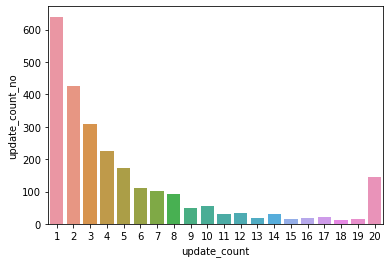

In [19]:
sns.barplot(x='update_count', y='update_count_no', data=counts)

1번 업데이트가 25% 를 차지하고, 2번 또는 3번이 16%, 12 % 를 차지했다. 

# 업데이트 횟수에 따른 펀딩성공의 연관성  

In [20]:
general = pd.read_csv('C:/Users/박예슬/OneDrive/데이터공부/project/Fund Raising 성공의 조건/final_data/general_final.csv')

In [21]:
general.head()

,chid,url,scrape_date,title,created_date,funds_raised,funds_target,picture,org_picture,counts_status_code,...,recent_time_window,funds_raised_dollar,funds_target_dollar,amount_raised_unattributed_dollar,char_age,success,dum_success,group_category,total_comments,update_counts
0,1,https://www.gofundme.com/f/-chris-beaty-memori...,2020-11-03,Chris Beaty Memorial Fund,2020-06-03,175083.0,200000.0,True,False,200,...,48 hours,175083,200000.0,0.0,153,False,0,Funerals & Memorials,74.0,1.0
1,2,https://www.gofundme.com/f/1-prosent-chance,2020-11-03,1 percent chance,2020-06-21,299042.0,2000000.0,True,False,200,...,48 hours,33792,226000.0,0.0,135,False,0,"Medical, Illness & Healing",0.0,0.0
2,3,https://www.gofundme.com/f/100-computers-in-10...,2020-11-04,MELS needs #100ComputersIn100Days,2020-06-19,13845.0,30000.0,True,True,200,...,48 hours,13845,30000.0,8196.0,138,False,0,Others,7.0,4.0
3,4,https://www.gofundme.com/f/100-to-victims-of-t...,2020-11-03,100% to Victims of Taal Volcano in Philippines,2020-01-16,25.0,5000.0,True,True,200,...,48 hours,25,5000.0,0.0,292,False,0,Accidents & Emergencies,0.0,0.0
4,5,https://www.gofundme.com/f/100k-for-center-for...,2020-11-04,$100k for Center for Family Life,2020-11-02,13950.0,100000.0,True,False,200,...,48 hours,13950,100000.0,1100.0,2,False,0,Others,1.0,0.0


In [72]:
# 성공 조건 만들기 funds_raised_dollar > funds_target_dollar 
general['gensuccess'] = general.funds_raised_dollar > general.funds_target_dollar
general['dum_gensuccess'] = general['gensuccess'].astype(int)

In [73]:
general

,chid,url,scrape_date,title,created_date,funds_raised,funds_target,picture,org_picture,counts_status_code,...,amount_raised_unattributed_dollar,char_age,success,dum_success,group_category,total_comments,update_counts,gensuccess,gendumsuccess,dum_gensuccess
0,1,https://www.gofundme.com/f/-chris-beaty-memori...,2020-11-03,Chris Beaty Memorial Fund,2020-06-03,175083.0,200000.0,True,False,200,...,0.0,153,False,0,Funerals & Memorials,74.0,1.0,False,0,0
1,2,https://www.gofundme.com/f/1-prosent-chance,2020-11-03,1 percent chance,2020-06-21,299042.0,2000000.0,True,False,200,...,0.0,135,False,0,"Medical, Illness & Healing",0.0,0.0,False,0,0
2,3,https://www.gofundme.com/f/100-computers-in-10...,2020-11-04,MELS needs #100ComputersIn100Days,2020-06-19,13845.0,30000.0,True,True,200,...,8196.0,138,False,0,Others,7.0,4.0,False,0,0
3,4,https://www.gofundme.com/f/100-to-victims-of-t...,2020-11-03,100% to Victims of Taal Volcano in Philippines,2020-01-16,25.0,5000.0,True,True,200,...,0.0,292,False,0,Accidents & Emergencies,0.0,0.0,False,0,0
4,5,https://www.gofundme.com/f/100k-for-center-for...,2020-11-04,$100k for Center for Family Life,2020-11-02,13950.0,100000.0,True,False,200,...,1100.0,2,False,0,Others,1.0,0.0,False,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3899,3901,https://www.gofundme.com/f/zuayzb-helping-the-...,2020-11-03,Helping the Hansens: A Family in Crisis,2020-07-24,68691.0,15000.0,True,False,200,...,48000.0,102,True,1,"Medical, Illness & Healing",17.0,0.0,True,1,1
3900,3902,https://www.gofundme.com/f/zurn-strong,2020-11-03,Zurn Strong,2020-10-13,41330.0,20000.0,True,False,200,...,41330.0,21,True,1,Funerals & Memorials,27.0,0.0,True,1,1
3901,3903,https://www.gofundme.com/f/zw3yb-culver-family,2020-11-03,Sean Culver recovery and rehab fund,2020-08-28,59205.0,50000.0,True,False,200,...,0.0,67,True,1,"Medical, Illness & Healing",41.0,3.0,True,1,1
3902,3904,https://www.gofundme.com/f/zwqzz9-50000,2020-11-03,In loving memory of Koorosh (Cyrus) Yaghoubian,2020-08-09,58767.0,80000.0,True,True,200,...,0.0,86,False,0,Funerals & Memorials,1.0,0.0,False,0,0


In [23]:
general.chid = general.chid.astype(int)

In [24]:
updates.head()

,chid,update_id,author,author_type,user_profile_url,text,photos,created_at,update_count
0,1,24893752,Organizer,Organizer,NaN,Thank you to everyone who donated to Chris’ Go...,False,2020-06-18 16:24:00+00:00,1
1,3,25518194,Organizer,Organizer,https://graph.facebook.com/v7.0/10156402123230...,We have raised over $12k for our computers! Th...,False,2020-08-30 10:27:00+00:00,4
2,3,25184752,Organizer,Organizer,https://graph.facebook.com/v7.0/10156402123230...,No matter what school looks like in September ...,False,2020-07-22 16:36:00+00:00,4
3,3,25010100,Organizer,Organizer,https://graph.facebook.com/v7.0/10156402123230...,Our campaign is 25% there! Thank you so much t...,False,2020-07-02 11:18:00+00:00,4
4,3,24922594,Organizer,Organizer,https://graph.facebook.com/v7.0/10156402123230...,We&#039;ve raised $4k towards our goal since F...,True,2020-06-22 11:36:00+00:00,4


In [74]:
# 업데이트 파일과 제네럴을 chid 로 머지해서 제네럴의 chid와 sucess를 가져온다 
sucess_count = updates.merge(general[['chid','dum_gensuccess']], on= 'chid',how='inner') 
#최종적으로 chid, updateno, sucess 가 있는 데이터 가져오기 
success_count= sucess_count[['chid', 'update_count','dum_gensuccess']]
success_count = sucess_count.groupby('chid')[['update_count','dum_gensuccess']].mean().reset_index()
sucess_count.head()

,chid,update_id,author,author_type,user_profile_url,text,photos,created_at,update_count,dum_gensuccess
0,1,24893752,Organizer,Organizer,NaN,Thank you to everyone who donated to Chris’ Go...,False,2020-06-18 16:24:00+00:00,1,0
1,3,25518194,Organizer,Organizer,https://graph.facebook.com/v7.0/10156402123230...,We have raised over $12k for our computers! Th...,False,2020-08-30 10:27:00+00:00,4,0
2,3,25184752,Organizer,Organizer,https://graph.facebook.com/v7.0/10156402123230...,No matter what school looks like in September ...,False,2020-07-22 16:36:00+00:00,4,0
3,3,25010100,Organizer,Organizer,https://graph.facebook.com/v7.0/10156402123230...,Our campaign is 25% there! Thank you so much t...,False,2020-07-02 11:18:00+00:00,4,0
4,3,24922594,Organizer,Organizer,https://graph.facebook.com/v7.0/10156402123230...,We&#039;ve raised $4k towards our goal since F...,True,2020-06-22 11:36:00+00:00,4,0


In [75]:
# 업데이트 횟수 당 펀딩에 성공한 캠페인 갯수와 비율 
result = sucess_count.groupby('update_count')['dum_gensuccess'].sum().reset_index().rename(columns={'dum_gensuccess':'success_cases'})
assert result.success_cases.sum() == sucess_count.dum_gensuccess.sum()
result['sucess_cases_percentage'] = (result.success_cases / result.success_cases.sum()) *100
result

,update_count,success_cases,sucess_cases_percentage
0,1,302,6.390182
1,2,338,7.151926
2,3,378,7.998307
3,4,336,7.109606
4,5,315,6.665256
5,6,228,4.824376
6,7,259,5.480322
7,8,248,5.247567
8,9,171,3.618282
9,10,260,5.501481


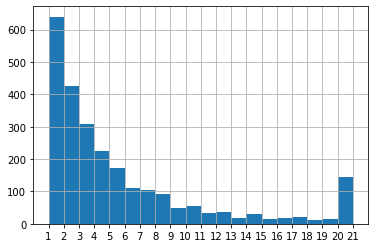

In [76]:
hist_prep = sucess_count.groupby('chid')['update_count'].mean().to_frame()
ax = hist_prep['update_count'].hist(bins=range(1,22))
ax.set_xticks(range(1,22))

In [77]:
result['group'] = (result['update_count']/3-0.01).apply(math.floor)
result['group'] = (result['group'] + 1)*3
result.groupby('group')['sucess_cases_percentage'].sum()

group
3     21.540415
6     18.599238
9     14.346170
12    10.431655
15     7.046128
18     6.115108
21    21.921287
Name: sucess_cases_percentage, dtype: float64

In [78]:
# 위의 내용과 동일하게 함수로 만들기 
def makegroup(df, unit):
    df['group'] = (df['update_count']/unit - 0.01).apply(math.floor)
    df['group'] = (result['group'] + 1)*unit
    df.groupby('group')['sucess_cases_percentage'].sum()
    return df

In [79]:
makegroup = makegroup(df=result, unit=3)
makegroup

,update_count,success_cases,sucess_cases_percentage,group
0,1,302,6.390182,3
1,2,338,7.151926,3
2,3,378,7.998307,3
3,4,336,7.109606,6
4,5,315,6.665256,6
5,6,228,4.824376,6
6,7,259,5.480322,9
7,8,248,5.247567,9
8,9,171,3.618282,9
9,10,260,5.501481,12


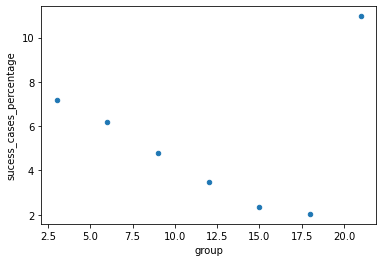

In [80]:
newdf = result.groupby('group')['sucess_cases_percentage'].mean().reset_index()
newdf.plot.scatter(x='group', y='sucess_cases_percentage')

In [81]:
newdf

,group,sucess_cases_percentage
0,3,7.180138
1,6,6.199746
2,9,4.782057
3,12,3.477218
4,15,2.348709
5,18,2.038369
6,21,10.960643


업데이트가 많아질수록 점점 떨어지는 양상을 보인다. 따라서 update를 많이한다고 기부성공이 되지는 않는다.  
마지막 그룹은 데이터한계로 그 이상은 보여줄 수 없기 때문에 outlier로서 인식하고 제외하면 된다.

In [82]:
ols('success_cases ~ update_count', data=makegroup).fit().summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:          success_cases   R-squared:                       0.011
Model:                            OLS   Adj. R-squared:                 -0.044
Method:                 Least Squares   F-statistic:                    0.2045
Date:                Sat, 28 Nov 2020   Prob (F-statistic):              0.656
Time:                        23:08:11   Log-Likelihood:                -133.62
No. Observations:                  20   AIC:                             271.2
Df Residuals:                      18   BIC:                             273.2
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
================================================================================
                   coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------
Intercept      273.7368     94.440      2.899      0.010      75.326     472.147
update_count    -3.5654      7.884     -0.452      0.656     -20.128      12.998
==============================================================================
Omnibus:                       36.585   Durbin-Watson:                   1.188
Prob(Omnibus):                  0.000   Jarque-Bera (JB):               95.950
Skew:                           2.918   Prob(JB):                     1.46e-21
Kurtosis:                      12.005   Cond. No.                         25.0
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

업데이트 횟수와 펀딩성공은 음의 상관관계를 가지지만 p값이 0.05보다 크므로 통계적으로 유의하지 않다. 

# update를 한 캠페인과 안한 캠페인 비교 (넘어가도 되는 내용) 

## 업데이트 한 캠페인과 1번이라도 한 캠페인간의 최종 모금액 비교 

In [83]:
general

,chid,url,scrape_date,title,created_date,funds_raised,funds_target,picture,org_picture,counts_status_code,...,amount_raised_unattributed_dollar,char_age,success,dum_success,group_category,total_comments,update_counts,gensuccess,gendumsuccess,dum_gensuccess
0,1,https://www.gofundme.com/f/-chris-beaty-memori...,2020-11-03,Chris Beaty Memorial Fund,2020-06-03,175083.0,200000.0,True,False,200,...,0.0,153,False,0,Funerals & Memorials,74.0,1.0,False,0,0
1,2,https://www.gofundme.com/f/1-prosent-chance,2020-11-03,1 percent chance,2020-06-21,299042.0,2000000.0,True,False,200,...,0.0,135,False,0,"Medical, Illness & Healing",0.0,0.0,False,0,0
2,3,https://www.gofundme.com/f/100-computers-in-10...,2020-11-04,MELS needs #100ComputersIn100Days,2020-06-19,13845.0,30000.0,True,True,200,...,8196.0,138,False,0,Others,7.0,4.0,False,0,0
3,4,https://www.gofundme.com/f/100-to-victims-of-t...,2020-11-03,100% to Victims of Taal Volcano in Philippines,2020-01-16,25.0,5000.0,True,True,200,...,0.0,292,False,0,Accidents & Emergencies,0.0,0.0,False,0,0
4,5,https://www.gofundme.com/f/100k-for-center-for...,2020-11-04,$100k for Center for Family Life,2020-11-02,13950.0,100000.0,True,False,200,...,1100.0,2,False,0,Others,1.0,0.0,False,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3899,3901,https://www.gofundme.com/f/zuayzb-helping-the-...,2020-11-03,Helping the Hansens: A Family in Crisis,2020-07-24,68691.0,15000.0,True,False,200,...,48000.0,102,True,1,"Medical, Illness & Healing",17.0,0.0,True,1,1
3900,3902,https://www.gofundme.com/f/zurn-strong,2020-11-03,Zurn Strong,2020-10-13,41330.0,20000.0,True,False,200,...,41330.0,21,True,1,Funerals & Memorials,27.0,0.0,True,1,1
3901,3903,https://www.gofundme.com/f/zw3yb-culver-family,2020-11-03,Sean Culver recovery and rehab fund,2020-08-28,59205.0,50000.0,True,False,200,...,0.0,67,True,1,"Medical, Illness & Healing",41.0,3.0,True,1,1
3902,3904,https://www.gofundme.com/f/zwqzz9-50000,2020-11-03,In loving memory of Koorosh (Cyrus) Yaghoubian,2020-08-09,58767.0,80000.0,True,True,200,...,0.0,86,False,0,Funerals & Memorials,1.0,0.0,False,0,0


In [84]:
# general 파일 (업데이트 유무 상관없는 모든 chid)에서 chid,amount_dollar를 가져온다 
all_chid = general[['chid','funds_raised_dollar']]
all_chid.groupby('chid')['funds_raised_dollar'].sum().to_frame().reset_index()

,chid,funds_raised_dollar
0,1,175083
1,2,33792
2,3,13845
3,4,25
4,5,13950
...,...,...
3899,3901,68691
3900,3902,41330
3901,3903,59205
3902,3904,58767


In [85]:
# updates 파일에는 update 된 캠페인만 있으므로, chid 가져와서 전부다 True인 데이터를 만든다 
did_update = updates.chid.drop_duplicates().to_frame()
did_update['did_update'] = True

In [86]:
did_update

,chid,did_update
0,1,True
1,3,True
5,7,True
6,8,True
8,9,True
...,...,...
13020,3891,True
13023,3894,True
13027,3898,True
13028,3903,True


In [87]:
# 상단의 all_chid 와 did_update를 outer merge 하면 did_update가 True 이면 업데이트 한것, False이면 업데이트 안 한것 
main = did_update.merge(all_chid, on='chid', how='outer')
main['did_update'] = main['did_update'].replace(np.NaN,False) 

In [88]:
main

,chid,did_update,funds_raised_dollar
0,1,True,175083
1,3,True,13845
2,7,True,21726
3,8,True,57750
4,9,True,96084
...,...,...,...
3899,3899,False,88518
3900,3900,False,59727
3901,3901,False,68691
3902,3902,False,41330


In [89]:
main['did_update'].value_counts()

True     2524
False    1380
Name: did_update, dtype: int64

In [90]:
table = main.groupby('did_update').mean()['funds_raised_dollar'].to_frame()
table

,funds_raised_dollar
did_update,
False,68081.531159
True,90380.423534


In [91]:
table.iloc[1,0] - table.iloc[0,0]

22298.892374652612

업데이트를 한번이라도 한 캠페인이 안한 캠페인보다 모금액이 약 2만 달러 더 많다. 

## update 횟수와 모금액의 관계 

In [92]:
dollars = general[['chid','funds_raised_dollar']]

In [93]:
numbers = updates.groupby('chid')['update_count'].mean().to_frame().reset_index()

In [94]:
main= numbers.merge(dollars, on='chid', how='outer')

In [96]:
stats = main['funds_raised_dollar'].describe()
iqr = stats['75%'] - stats['25%']
outlier_high = stats['75%'] + 3*iqr
outlier_low = stats['25%'] - 3*iqr
main = main[ (main['funds_raised_dollar'] < outlier_high) & (main['funds_raised_dollar'] > outlier_low) ]


In [97]:
main # outlier 제거된 데이터 

,chid,update_count,funds_raised_dollar
0,1,1.0,175083
1,3,4.0,13845
2,7,1.0,21726
3,8,2.0,57750
4,9,2.0,96084
...,...,...,...
3899,3899,NaN,88518
3900,3900,NaN,59727
3901,3901,NaN,68691
3902,3902,NaN,41330


In [98]:
main['update_count'] = main.update_count.replace(np.NaN, 0)

<ipython-input-98-563f774e01ea>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  main['update_count'] = main.update_count.replace(np.NaN, 0)


In [99]:
line = main.groupby('update_count')['funds_raised_dollar'].mean().to_frame().reset_index()
line 

,update_count,funds_raised_dollar
0,0.0,51520.139745
1,1.0,61303.585089
2,2.0,63609.689826
3,3.0,63810.089965
4,4.0,72378.072115
5,5.0,70480.117284
6,6.0,69463.584158
7,7.0,65072.170213
8,8.0,72234.963415
9,9.0,73829.785714


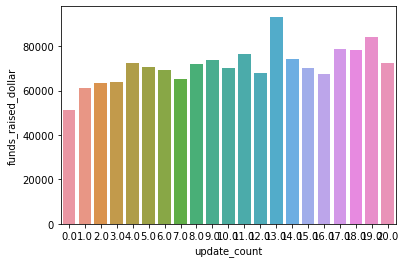

In [100]:
sns.barplot(x='update_count', y='funds_raised_dollar', data=line)

업데이트 횟수가 많을수록 모금액이 많아지는 경향성을 보인다.

In [101]:
ols('funds_raised_dollar ~ update_count', data=line).fit().summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                             OLS Regression Results                            
===============================================================================
Dep. Variable:     funds_raised_dollar   R-squared:                       0.437
Model:                             OLS   Adj. R-squared:                  0.408
Method:                  Least Squares   F-statistic:                     14.77
Date:                 Sat, 28 Nov 2020   Prob (F-statistic):            0.00110
Time:                         23:10:18   Log-Likelihood:                -213.57
No. Observations:                   21   AIC:                             431.1
Df Residuals:                       19   BIC:                             433.2
Df Model:                            1                                         
Covariance Type:             nonrobust                                         
================================================================================
                   coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------
Intercept     6.211e+04   2798.096     22.197      0.000    5.63e+04     6.8e+04
update_count   919.7379    239.349      3.843      0.001     418.775    1420.701
==============================================================================
Omnibus:                        8.283   Durbin-Watson:                   2.052
Prob(Omnibus):                  0.016   Jarque-Bera (JB):                6.188
Skew:                           0.897   Prob(JB):                       0.0453
Kurtosis:                       4.964   Cond. No.                         22.7
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

업데이트 횟수가 증가하면 모금액은 933달러 증가한다. p 값이 0.5보다 낮으므로 통계적으로 유의하다.  
r 값도 30% 이상의 수치를 가진다. 

# updates 란 최신 글에 사진 업데이트를 한 갯수와 모금액의 연관성  

## outlier 제거 전 비교 

In [102]:
yesphoto= updates.groupby('chid')['photos'].sum().to_frame()
new = pd.merge(yesphoto, general, on='chid', how='inner')

In [103]:
new.head()

,chid,photos,url,scrape_date,title,created_date,funds_raised,funds_target,picture,org_picture,...,amount_raised_unattributed_dollar,char_age,success,dum_success,group_category,total_comments,update_counts,gensuccess,gendumsuccess,dum_gensuccess
0,1,0.0,https://www.gofundme.com/f/-chris-beaty-memori...,2020-11-03,Chris Beaty Memorial Fund,2020-06-03,175083.0,200000.0,True,False,...,0.000,153,False,0,Funerals & Memorials,74.0,1.0,False,0,0
1,3,1.0,https://www.gofundme.com/f/100-computers-in-10...,2020-11-04,MELS needs #100ComputersIn100Days,2020-06-19,13845.0,30000.0,True,True,...,8196.000,138,False,0,Others,7.0,4.0,False,0,0
2,7,0.0,https://www.gofundme.com/f/1lr10riclc,2020-11-04,BK Bank Thanksgiving Turkey & Xmas Toys Giveaw...,2019-11-09,21726.0,20000.0,True,True,...,2492.000,361,True,1,Others,32.0,1.0,True,1,1
3,8,0.0,https://www.gofundme.com/f/1ls0zhso2o,2020-11-03,�떒�땵�닄�떟�돜 �뙂�떝�닜�뒘�뒖 �뒯500 �돖�닂�떗 �닔�뒓�뒶�댊�돲�...,2020-04-10,57750.0,100000.0,True,True,...,0.000,207,False,0,Accidents & Emergencies,58.0,2.0,False,0,0
4,9,0.0,https://www.gofundme.com/f/1sc9471cmo,2020-11-03,Please Help A New Mother Battle Brain Cancer,2019-11-04,82165.0,50000.0,True,True,...,85260.954,365,True,1,"Medical, Illness & Healing",95.0,2.0,True,1,1


In [104]:
new.shape

(2524, 44)

하단의 아웃라이어 한 것과 128 개 차이남. 전체에서 5% 

## outlier 제거 후 비교 

In [105]:
yesphoto= updates.groupby('chid')['photos'].sum().to_frame()
new = pd.merge(yesphoto, general, on='chid', how='inner')
# yesphoto.merge(general, on='chid',how='inner')

In [106]:
stats = new['funds_raised_dollar'].describe()
iqr = stats['75%'] - stats['25%']
outlier_high = stats['75%'] + 3*iqr
outlier_low = stats['25%'] - 3*iqr
nooutlier = new[ (new['funds_raised_dollar'] < outlier_high) & (new['funds_raised_dollar'] > outlier_low) ]
nooutlier.head()

,chid,photos,url,scrape_date,title,created_date,funds_raised,funds_target,picture,org_picture,...,amount_raised_unattributed_dollar,char_age,success,dum_success,group_category,total_comments,update_counts,gensuccess,gendumsuccess,dum_gensuccess
0,1,0.0,https://www.gofundme.com/f/-chris-beaty-memori...,2020-11-03,Chris Beaty Memorial Fund,2020-06-03,175083.0,200000.0,True,False,...,0.000,153,False,0,Funerals & Memorials,74.0,1.0,False,0,0
1,3,1.0,https://www.gofundme.com/f/100-computers-in-10...,2020-11-04,MELS needs #100ComputersIn100Days,2020-06-19,13845.0,30000.0,True,True,...,8196.000,138,False,0,Others,7.0,4.0,False,0,0
2,7,0.0,https://www.gofundme.com/f/1lr10riclc,2020-11-04,BK Bank Thanksgiving Turkey & Xmas Toys Giveaw...,2019-11-09,21726.0,20000.0,True,True,...,2492.000,361,True,1,Others,32.0,1.0,True,1,1
3,8,0.0,https://www.gofundme.com/f/1ls0zhso2o,2020-11-03,�떒�땵�닄�떟�돜 �뙂�떝�닜�뒘�뒖 �뒯500 �돖�닂�떗 �닔�뒓�뒶�댊�돲�...,2020-04-10,57750.0,100000.0,True,True,...,0.000,207,False,0,Accidents & Emergencies,58.0,2.0,False,0,0
4,9,0.0,https://www.gofundme.com/f/1sc9471cmo,2020-11-03,Please Help A New Mother Battle Brain Cancer,2019-11-04,82165.0,50000.0,True,True,...,85260.954,365,True,1,"Medical, Illness & Healing",95.0,2.0,True,1,1


In [107]:
nooutlier.shape

(2396, 44)

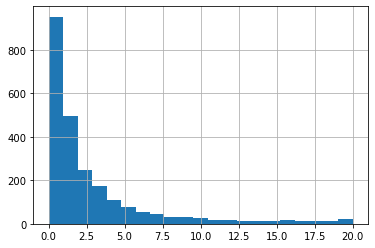

In [108]:
nooutlier['photos'].hist(bins=21)

In [109]:
nooutlierdata = nooutlier.groupby('photos')['funds_raised_dollar'].mean()
nooutlierdata= nooutlierdata.to_frame().reset_index()

In [110]:
nooutlierdata

,photos,funds_raised_dollar
0,0.0,67272.518908
1,1.0,67913.640404
2,2.0,68452.596774
3,3.0,72969.657143
4,4.0,72765.387387
5,5.0,73464.500000
6,6.0,76800.821429
7,7.0,67923.130435
8,8.0,77686.600000
9,9.0,78190.000000


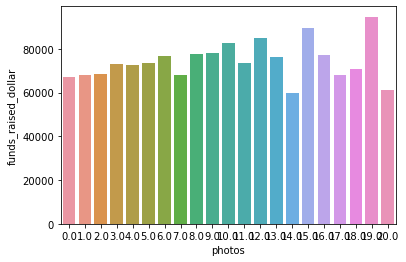

In [111]:
sns.barplot(x='photos', y='funds_raised_dollar', data=nooutlierdata)

사진 업데이트를 많이 할 수록 모금액이 높아지는 경향성이 있다. 

In [112]:
ols('funds_raised_dollar ~ photos', data=nooutlierdata).fit().summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                             OLS Regression Results                            
===============================================================================
Dep. Variable:     funds_raised_dollar   R-squared:                       0.049
Model:                             OLS   Adj. R-squared:                 -0.002
Method:                  Least Squares   F-statistic:                    0.9692
Date:                 Sat, 28 Nov 2020   Prob (F-statistic):              0.337
Time:                         23:10:51   Log-Likelihood:                -219.08
No. Observations:                   21   AIC:                             442.2
Df Residuals:                       19   BIC:                             444.3
Df Model:                            1                                         
Covariance Type:             nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept   7.131e+04   3637.623     19.605      0.000    6.37e+04    7.89e+04
photos       306.3394    311.162      0.985      0.337    -344.930     957.609
==============================================================================
Omnibus:                        0.378   Durbin-Watson:                   2.575
Prob(Omnibus):                  0.828   Jarque-Bera (JB):                0.002
Skew:                           0.024   Prob(JB):                        0.999
Kurtosis:                       3.015   Cond. No.                         22.7
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

사진을 한개 추가하면 모금액이 306달러 높아지는 것으로 나왔다.  
하지만 p 값이 0.05 이상이라서 통계적으로 유의하지 않다. 

# 사진 업데이트를 한 것과 펀딩 성공의 연관성 

In [113]:
# 업데이트 한 photo 갯수에 따른 성공한 캠페인 갯수 
photo_success = nooutlier.groupby('photos')['dum_gensuccess'].sum().reset_index()

In [114]:
# 상단에 만든, nooutlier (업데이트 한 photo 갯수에 따른 펀드금액) 테이블과 합친다. 
res =  photo_success.merge(nooutlierdata, on= 'photos', how='inner')
res

,photos,dum_gensuccess,funds_raised_dollar
0,0.0,438,67272.518908
1,1.0,204,67913.640404
2,2.0,83,68452.596774
3,3.0,63,72969.657143
4,4.0,37,72765.387387
5,5.0,27,73464.500000
6,6.0,20,76800.821429
7,7.0,17,67923.130435
8,8.0,10,77686.600000
9,9.0,11,78190.000000


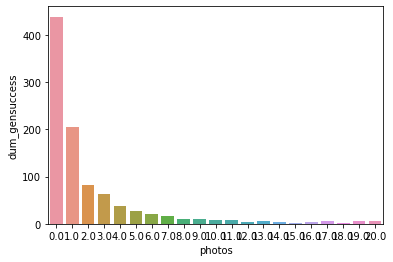

In [115]:
sns.barplot(x='photos', y='dum_gensuccess', data=res)

사진을 적게 업데이트할 수록 펀딩 성공하는 캠페인이 더 많았다. 

In [116]:
ols('dum_gensuccess ~ photos', data=res).fit().summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:         dum_gensuccess   R-squared:                       0.370
Model:                            OLS   Adj. R-squared:                  0.337
Method:                 Least Squares   F-statistic:                     11.18
Date:                Sat, 28 Nov 2020   Prob (F-statistic):            0.00342
Time:                        23:11:31   Log-Likelihood:                -121.33
No. Observations:                  21   AIC:                             246.7
Df Residuals:                      19   BIC:                             248.7
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept    144.7013     34.616      4.180      0.001      72.250     217.153
photos        -9.8987      2.961     -3.343      0.003     -16.096      -3.701
==============================================================================
Omnibus:                       29.732   Durbin-Watson:                   0.500
Prob(Omnibus):                  0.000   Jarque-Bera (JB):               58.935
Skew:                           2.421   Prob(JB):                     1.59e-13
Kurtosis:                       9.626   Cond. No.                         22.7
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

사진을 업데이트 1번 하면 성공도 줄어든다.  p 값이 0.05보다 낮으므로 통계적으로 유의하다.  
r 값도 30% 이상의 수치를 보였다. 